# Tutorial of Reinforcement Learning (Dueling DQN/Breakout)

Please get in touch if interested in our future collaboration of science and/or business!\
Daiphys Technologies LLC - https://www.daiphys.com/

## 0. References

- https://gymnasium.farama.org/environments/atari/breakout/
- https://storage.googleapis.com/deepmind-data/assets/papers/DeepMindNature14236Paper.pdf
- https://arxiv.org/abs/1511.06581
- https://www.datahubbs.com/deepmind-dqn/
- https://www.dskomei.com/entry/2021/10/05/140156
- https://qiita.com/omuram/items/c03a2b2266c958564a9a
- https://qiita.com/mathlive/items/8e1f9a8467fff8dfd03c
- https://unproductive.dev/rl-implementation-dqn/
- https://torch.classcat.com/2021/04/26/pytorch-1-8-tutorials-intermediate-reinforcement-q-learning/
- https://take-tech-engineer.com/gymnasium-atari-breakout/
- https://take-tech-engineer.com/dqn-atari-breakout-pytorch/
- https://ex-ture.com/blog/2021/01/11/pytorch-cnn/
- https://github.com/BY571/DQN-Atari-Agents/blob/master/Agents/Networks/DQN.py
- https://github.com/openai/baselines/blob/1b092434fc51efcb25d6650e287f07634ada1e08/baselines/common/models.py

## 1. Preparation

### 1.1. Install

In [ ]:
## Python
!python --version

Python 3.9.16


In [ ]:
## PyTorch
!python -c 'import torch; print(torch.__version__)'

2.0.0+cu118


In [ ]:
## CUDA
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [ ]:
!nvidia-smi

Fri Apr 14 08:22:04 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:4 http://archive.ubuntu.com/ubuntu focal InRelease
Get:5 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:8 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Get:10 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:11 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Get:12 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [1,029 kB]
Get:13 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3,076 kB]
Get:14 http://se

In [ ]:
#!pip install --upgrade gymnasium[classic-control]
!pip install --upgrade gymnasium[atari]
!pip install --upgrade gymnasium[accept-rom-license]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 925.5/925.5 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 51.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 28.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.6.1-py3-none-any.whl size=446676 sha256=ef3c9cb9852a1eae47fa06095f8a8ea66e4898e6ed1442ea94882c677bad49c0
  Stored in directory: /root/.cache/pip/wheels/b1/1f/f7/2da07cf4f81ea264bdaf043028749d88fe0c2227134a22cf80
Successfully built AutoROM.accept-rom-license


In [ ]:
## Gymnasium 0.20.0+
!python -c 'import gymnasium; print(gymnasium.__version__)'

0.28.1


In [ ]:
## X11 Virtual Framebuffer
#!apt-get install -y xvfb
#!apt-get install -y python-opengl
#!apt-get install -y ffmpeg
#!pip install pyvirtualdisplay

### 1.2. Import

In [ ]:
#!pip list
#!pip freeze > requirements.txt

In [ ]:
import os
import sys
import numpy as np
import scipy as sp
import pandas as pd
import cv2
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation
import pickle
import re
import csv
import math
import random
import time
import datetime

In [ ]:
#from google.colab.patches import cv2_imshow

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
import gymnasium as gym

In [ ]:
from collections import namedtuple
from collections import deque
from itertools import count

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import glob
import io
import base64
import IPython

In [ ]:
import pygame
import moviepy

In [ ]:
from typing import Optional

In [ ]:
## X11 Virtual Framebuffer
#import pyvirtualdisplay
#display = pyvirtualdisplay.Display(visible=0, size=(1024, 768))
#display.start()

In [ ]:
%matplotlib inline
#plt.rcParams['figure.figsize'] = [12, 8]

In [ ]:
plt.ion()

### 1.3. Setup

In [ ]:
project = 'breakout'

In [ ]:
output_dir = project + '/output'
checkpoint_dir = project + '/checkpoint'

In [ ]:
!mkdir -p $output_dir
!mkdir -p $checkpoint_dir

In [ ]:
if torch.cuda.is_available() :
    device = 'cuda'
    #device = 'cuda:0'
else :
    device = 'cpu'

## 2. Sample (Breakout)

### 2.1. Environment

#### 2.1.1. Environment Setup

In [ ]:
env = gym.make('ALE/Breakout-v5', render_mode='rgb_array')

In [ ]:
env = gym.wrappers.RecordVideo(env, output_dir)
#env = gym.wrappers.RecordVideo(env, output_dir, episode_trigger=(lambda ep: ep == 0 or ep == 9 or ep % 100 == 99))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/gymnasium/wrappers/record_video.py:87: UserWarning: WARN: Overwriting existing videos at /content/breakout/output folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


In [ ]:
## Action Space
env.action_space

Discrete(4)

In [ ]:
## Observation Space
env.observation_space

Box(0, 255, (210, 160, 3), uint8)

In [ ]:
## Reward Range
env.reward_range

(-inf, inf)

In [ ]:
state, info = env.reset(seed=random.randint(0, (2**24)))
state.size, info

/usr/local/lib/python3.9/dist-packages/gymnasium/utils/passive_env_checker.py:364: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(


(100800,
 {'lives': 5,
  'episode_frame_number': 0,
  'frame_number': 0,
  'seeds': (584850855, 128182072)})

In [ ]:
img = env.render()

In [ ]:
state_text_01 = f'steps = 0'
state_text_02 = f'lives = {info["lives"]}'

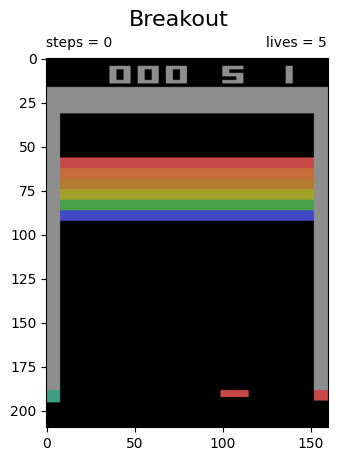

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.suptitle('Breakout', fontsize=16)
plt.imshow(img)
plt.text(0, 1.03, state_text_01, fontsize=10, transform=ax.transAxes)
plt.text(0.78, 1.03, state_text_02, fontsize=10, transform=ax.transAxes)
plt.show()

### 2.2. Algorithm

#### 2.2.1. Experience Replay Memory

In [ ]:
Transition = namedtuple('Transition', ('state', 'action', 'next_state', 'reward'))

In [ ]:
class ReplayMemory(object) :
    def __init__(self, capacity) :
        self.memory = deque([], maxlen=capacity)
    def push(self, *args) :
        self.memory.append(Transition(*args))
    def sample(self, batch_size) :
        return random.sample(self.memory, batch_size)
    def __len__(self) :
        return len(self.memory)

#### 2.2.2. Network

##### 2.2.2.1. DQN - Multilayer Perceptron (MLP)

In [ ]:
class DQN_MLP(nn.Module) :
    def __init__(self, n_observations, n_actions) :
        super(DQN_MLP, self).__init__()
        self.layer1 = nn.Linear(n_observations, 128)
        self.layer2 = nn.Linear(128, 128)
        self.layer3 = nn.Linear(128, n_actions)
    def forward(self, x) :
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        return self.layer3(x)

##### 2.2.2.2. Dueling DQN - CNN

In [ ]:
def weight_init(layers) :
    for layer in layers :
        torch.nn.init.kaiming_normal_(layer.weight, nonlinearity='relu')

In [ ]:
class DuelingDQN_CNN(nn.Module) :
    def __init__(self, n_frames, n_actions) :
        super(DuelingDQN_CNN, self).__init__()
        self.conv1 = nn.Conv2d(n_frames, 32, 8, 4)
        self.conv2 = nn.Conv2d(32, 64, 4, 2)
        self.conv3 = nn.Conv2d(64, 64, 3, 1)
        self.flatten = nn.Flatten()
        self.fc_value1 = nn.Linear(3136, 512)
        self.fc_value2 = nn.Linear(512, 1)
        self.fc_advantage1 = nn.Linear(3136, 512)
        self.fc_advantage2 = nn.Linear(512, n_actions)
        weight_init([self.conv1, self.conv2, self.conv3, self.fc_value1, self.fc_value2, self.fc_advantage1, self.fc_advantage2])
    def forward(self, x) :
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = self.flatten(x)
        x_value = F.relu(self.fc_value1(x))
        x_value = self.fc_value2(x_value)
        x_advantage = F.relu(self.fc_advantage1(x))
        x_advantage = self.fc_advantage2(x_advantage)
        q = x_value + x_advantage - x_advantage.mean()
        return q

#### 2.2.3. Action Selection (Epsilon-Greedy Algorithm)

In [ ]:
def select_action(state) :
    global steps_done
    sample = random.random()
    eps_threshold = EPS_END + (EPS_START - EPS_END) * math.exp(-1. * steps_done / EPS_DECAY)
    steps_done += 1
    if sample > eps_threshold :
        with torch.no_grad() :
            return policy_net(state).max(1)[1].view(1, 1), eps_threshold
    else :
        ## Random Action
        return torch.tensor([[env.action_space.sample()]], device=device, dtype=torch.long), eps_threshold

#### 2.2.4. Training Loop

In [ ]:
def optimize_model() :
    global state_action_values
    global loss
    if len(memory) < BATCH_SIZE :
        return
    transitions = memory.sample(BATCH_SIZE)
    batch = Transition(*zip(*transitions))
    non_final_mask = torch.tensor(tuple(map(lambda s: s is not None, batch.next_state)), device=device, dtype=torch.bool)
    non_final_next_states = torch.cat([s for s in batch.next_state if s is not None])
    state_batch = torch.cat(batch.state)
    action_batch = torch.cat(batch.action)
    reward_batch = torch.cat(batch.reward)
    state_action_values = policy_net(state_batch).gather(1, action_batch)
    next_state_values = torch.zeros(BATCH_SIZE, device=device)
    with torch.no_grad() :
        next_state_values[non_final_mask] = target_net(non_final_next_states).max(1)[0]
    expected_state_action_values = (next_state_values * GAMMA) + reward_batch
    criterion = nn.SmoothL1Loss()
    loss = criterion(state_action_values, expected_state_action_values.unsqueeze(1))
    optimizer.zero_grad()
    loss.backward()
    torch.nn.utils.clip_grad_value_(policy_net.parameters(), 1000)
    optimizer.step()

#### 2.2.5. Plot Function

In [ ]:
def plot_rewards(realtime=False) :
    fig = plt.figure()
    rewards = torch.tensor(episode_rewards, dtype=torch.float)
    steps = torch.tensor(episode_steps, dtype=torch.int)
    if realtime :
        plt.clf()
        plt.suptitle('Training...')
    else :
        plt.suptitle('Training Result')
    ax1 = fig.add_subplot(2, 1, 1)
    #ax1.set_xlabel('Episode')
    ax1.set_ylabel('Reward')
    ax1.grid(linestyle='--')
    ax1.tick_params('x', length=0)
    ax1.plot(rewards.numpy())
    if len(rewards) >= 100 :
        bin = 100
    else :
        bin = len(rewards)
    means = rewards.unfold(0, bin, 1).mean(1).view(-1)
    means = torch.cat((torch.zeros(bin - 1) + means[0], means))
    ax1.plot(means.numpy())
    ax2 = fig.add_subplot(2, 1, 2, sharex=ax1)
    ax2.set_xlabel('Episode')
    ax2.set_ylabel('Steps')
    ax2.grid(linestyle='--')
    ax2.plot(steps.numpy())
    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.subplots_adjust(hspace=0.10)
    plt.pause(0.001)
    if realtime :
        IPython.display.display(plt.gcf())
        IPython.display.clear_output(wait=True)
    else :
        IPython.display.display(plt.gcf())

#### 2.2.6. Utilities

In [ ]:
def image_preproc(img, size) :
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img / 255.0
    img = cv2.resize(src=img, dsize=size)
    img = torch.tensor(img, dtype=torch.float32, device=device).unsqueeze(0)
    return img

In [ ]:
def atoi(text) :
    return int(text) if text.isdigit() else text

In [ ]:
def natural_keys(text) :
    return [atoi(c) for c in re.split(r'(\d+)', text)]

### 2.3. Training

#### 2.3.1. Hyperparameters

In [ ]:
## Q-Learning: Batch Size
BATCH_SIZE = 128

In [ ]:
## Q-Learning: Discount Factor
GAMMA = 0.99

In [ ]:
## Epsilon-Greedy Thresholds
EPS_START = 0.90
EPS_END = 0.05
EPS_DECAY = 1000

In [ ]:
## Target Network: Update Rate
TAU = 0.005

In [ ]:
## Optimizer: Learning Rate
LR = 1e-04

In [ ]:
## Image Downsizing = (Width, Height)
IMAGE_SIZE = (84, 84)

In [ ]:
## Number of Processing Frames
NUM_FRAMES = 6

#### 2.3.2. Model Initialization

In [ ]:
n_actions = env.action_space.n

In [ ]:
policy_net = DuelingDQN_CNN(NUM_FRAMES, n_actions).to(device)
target_net = DuelingDQN_CNN(NUM_FRAMES, n_actions).to(device)

In [ ]:
target_net.load_state_dict(policy_net.state_dict())

<All keys matched successfully>

In [ ]:
## In case of recovery
#policy_net.load_state_dict(torch.load(checkpoint_dir + '/policy_net_final.pth'))
#target_net.load_state_dict(torch.load(checkpoint_dir + '/target_net_final.pth'))

In [ ]:
optimizer = optim.AdamW(policy_net.parameters(), lr=LR, amsgrad=True)

In [ ]:
memory = ReplayMemory(10000)
#memory = ReplayMemory(100000)

In [ ]:
steps_done = 0
state_action_values = np.array(0.0)
loss = 0.0

In [ ]:
episode_rewards = []
episode_steps = []

#### 2.3.3. Training

In [ ]:
num_episodes = 3000

In [ ]:
num_episodes_save = 100

episode: 299, steps: 257, reward: 7.000, loss: 4.429e-04, mean_q: 2.789e+00


<Figure size 640x480 with 0 Axes>

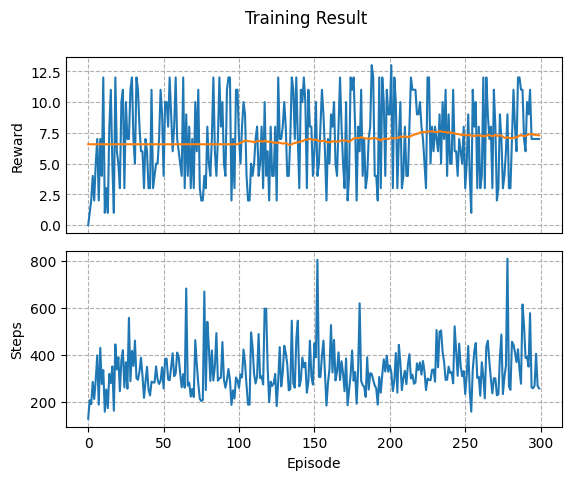

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
for i_episode in range(num_episodes) :
    state, info = env.reset(seed=random.randint(0, (2**24)))
    #state = torch.tensor(state, dtype=torch.float32, device=device).unsqueeze(0)
    state = image_preproc(state, IMAGE_SIZE)
    ################################################################################
    ## Time-Series States
    ################################################################################
    frame = torch.zeros((1, NUM_FRAMES, IMAGE_SIZE[1], IMAGE_SIZE[0]), dtype=torch.float32, device=device)
    frame[:, 0, :, :] = state
    next_frame = torch.zeros((1, NUM_FRAMES, IMAGE_SIZE[1], IMAGE_SIZE[0]), dtype=torch.float32, device=device)
    next_frame[:, 0, :, :] = state
    ################################################################################
    reward_total = 0
    for t in count() :
        #action, eps_threshold = select_action(state)
        action, eps_threshold = select_action(frame)
        observation, reward, terminated, truncated, info = env.step(action.item())
        observation = image_preproc(observation, IMAGE_SIZE)
        reward = torch.tensor([reward], device=device)
        reward_total += reward
        done = terminated or truncated
        if terminated :
            #next_state = None
            next_frame = None
        else :
            #next_state = torch.tensor(observation, dtype=torch.float32, device=device).unsqueeze(0)
            next_frame = torch.roll(input=next_frame, shifts=1, dims=1)
            next_frame[:, 0, :, :] = observation
        #memory.push(state, action, next_state, reward)
        memory.push(frame, action, next_frame, reward)
        #state = next_state
        frame = next_frame
        optimize_model()
        target_net_state_dict = target_net.state_dict()
        policy_net_state_dict = policy_net.state_dict()
        for key in policy_net_state_dict :
            target_net_state_dict[key] = policy_net_state_dict[key] * TAU + target_net_state_dict[key] * (1 - TAU)
        target_net.load_state_dict(target_net_state_dict)
        if done :
            episode_rewards.append(reward_total)
            episode_steps.append(t + 1)
            print(f'episode: {i_episode}, steps: {(t + 1)}, reward: {reward_total[0]:.3f}, loss: {loss:.3e}, mean_q: {state_action_values.mean():.3e}')
            if i_episode % 20 == 0 :
                IPython.display.clear_output(wait=True)
                plot_rewards(realtime=False)
            break
    if (i_episode % num_episodes_save == 0) :
        torch.save(policy_net.state_dict(), checkpoint_dir + '/policy_net_' + str(i_episode) + '.pth')
        torch.save(target_net.state_dict(), checkpoint_dir + '/target_net_' + str(i_episode) + '.pth')
    if (i_episode == range(num_episodes)[-1]) :
        torch.save(policy_net.state_dict(), checkpoint_dir + '/policy_net_final.pth')
        torch.save(target_net.state_dict(), checkpoint_dir + '/target_net_final.pth')

IPython.display.clear_output(wait=True)
print(f'episode: {i_episode}, steps: {(t + 1)}, reward: {reward_total[0]:.3f}, loss: {loss:.3e}, mean_q: {state_action_values.mean():.3e}')
plot_rewards()

#### 2.3.4. Video Output

In [ ]:
mp4list = glob.glob(output_dir + '/rl-video-episode-*.mp4')
if len(mp4list) > 0 :
    for mp4 in sorted(mp4list, key=natural_keys)[::(len(mp4list) - 1 if len(mp4list) >= 2 else 1)] :
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        IPython.display.display(IPython.display.HTML(data='''{mp4}<br>
            <video alt="{mp4}" autoplay loop controls style="height: 200px;">
            <source src="data:video/mp4;base64,{src}" type="video/mp4">
            </video>'''.format(mp4=mp4, src=encoded.decode('ascii'))))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 2.4. Play

#### 2.4.1. Trained Model

In [ ]:
env = gym.make('ALE/Breakout-v5', render_mode='rgb_array')

In [ ]:
env = gym.wrappers.RecordVideo(env, output_dir, name_prefix='play-video')
#env = gym.wrappers.RecordVideo(env, output_dir, episode_trigger=(lambda ep: ep == 0 or ep == 9 or ep % 100 == 99), name_prefix='play-video')

/usr/local/lib/python3.9/dist-packages/gymnasium/wrappers/record_video.py:87: UserWarning: WARN: Overwriting existing videos at /content/breakout/output folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


In [ ]:
n_actions = env.action_space.n

In [ ]:
state, info = env.reset(seed=random.randint(0, (2**24)))

/usr/local/lib/python3.9/dist-packages/gymnasium/utils/passive_env_checker.py:364: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(


In [ ]:
#n_observations = len(state)
n_observations = state.size

In [ ]:
policy_net = DuelingDQN_CNN(NUM_FRAMES, n_actions).to(device)

In [ ]:
pthlist = glob.glob(checkpoint_dir + '/policy_net_*.pth')
pthfile = sorted(pthlist, key=natural_keys)[-1]
pthfile

'breakout/checkpoint/policy_net_final.pth'

In [ ]:
policy_net.load_state_dict(torch.load(pthfile))

<All keys matched successfully>

In [ ]:
policy_net.eval()

DQN_CNN_Dueling(
  (conv1): Conv2d(6, 32, kernel_size=(8, 8), stride=(4, 4))
  (conv2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc_value1): Linear(in_features=3136, out_features=512, bias=True)
  (fc_value2): Linear(in_features=512, out_features=1, bias=True)
  (fc_advantage1): Linear(in_features=3136, out_features=512, bias=True)
  (fc_advantage2): Linear(in_features=512, out_features=4, bias=True)
)

#### 2.4.2. Play

steps: 471Moviepy - Building video /content/breakout/output/play-video-episode-1.mp4.
Moviepy - Writing video /content/breakout/output/play-video-episode-1.mp4



Moviepy - Done !
Moviepy - video ready /content/breakout/output/play-video-episode-1.mp4


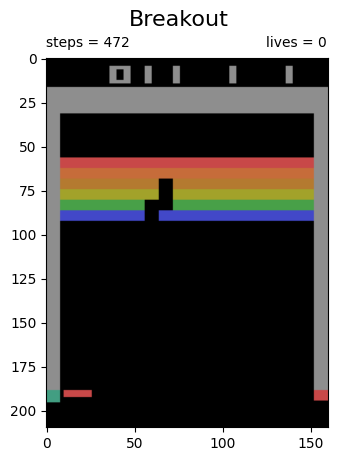

In [ ]:
state, info = env.reset(seed=random.randint(0, (2**24)))
observation = state
#state = torch.tensor(state, dtype=torch.float32, device=device).unsqueeze(0)
state = image_preproc(state, IMAGE_SIZE)

frame = torch.zeros((1, NUM_FRAMES, IMAGE_SIZE[1], IMAGE_SIZE[0]), dtype=torch.float32, device=device)
frame[:, 0, :, :] = state
next_frame = torch.zeros((1, NUM_FRAMES, IMAGE_SIZE[1], IMAGE_SIZE[0]), dtype=torch.float32, device=device)
next_frame[:, 0, :, :] = state

steps = 0
ims = []
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.suptitle('Breakout', fontsize=16)

## Initial Frame
state_text_01 = f'steps = {steps}'
state_text_02 = f'lives = {info["lives"]}'
img = env.render()
image = plt.imshow(img, animated=True)
text_01 = plt.text(0, 1.03, state_text_01, fontsize=10, transform=ax.transAxes)
text_02 = plt.text(0.78, 1.03, state_text_02, fontsize=10, transform=ax.transAxes)
ims.append([image] + [text_01] + [text_02])
plt.gca().texts[-1].set_visible(False)
plt.gca().texts[-2].set_visible(False)

while True :
    print('\r' + 'steps: ' + str(steps), end='')
    #action = policy_net(state).max(1)[1].view(1, 1)
    action = policy_net(frame).max(1)[1].view(1, 1)
    observation, reward, terminated, truncated, info = env.step(action.item())
    observation = image_preproc(observation, IMAGE_SIZE)
    steps += 1
    state_text_01 = f'steps = {steps}'
    state_text_02 = f'lives = {info["lives"]}'
    img = env.render()
    image = plt.imshow(img, animated=True)
    text_01 = plt.text(0, 1.03, state_text_01, fontsize=10, transform=ax.transAxes)
    text_02 = plt.text(0.78, 1.03, state_text_02, fontsize=10, transform=ax.transAxes)
    ims.append([image] + [text_01] + [text_02])
    plt.gca().texts[-1].set_visible(False)
    plt.gca().texts[-2].set_visible(False)
    done = terminated or truncated
    if terminated :
        #next_state = None
        next_frame = None
    else :
        #next_state = torch.tensor(observation, dtype=torch.float32, device=device).unsqueeze(0)
        next_frame = torch.roll(input=next_frame, shifts=1, dims=1)
        next_frame[:, 0, :, :] = observation
    #state = next_state
    frame = next_frame
    if done :
        plt.gca().texts[-1].set_visible(True)
        plt.gca().texts[-2].set_visible(True)
        break

#### 2.4.3. Video Output

In [ ]:
mp4list = glob.glob(output_dir + '/play-video-episode-*.mp4')
if len(mp4list) > 0 :
    for mp4 in sorted(mp4list, key=natural_keys)[::(len(mp4list) - 1 if len(mp4list) >= 2 else 1)] :
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        IPython.display.display(IPython.display.HTML(data='''{mp4}<br>
            <video alt="{mp4}" autoplay loop controls style="height: 200px;">
            <source src="data:video/mp4;base64,{src}" type="video/mp4">
            </video>'''.format(mp4=mp4, src=encoded.decode('ascii'))))

#### 2.4.4. GIF Output

In [ ]:
gif = output_dir + '/play-video-episode-0.gif'

In [ ]:
#fig.set_size_inches(6.4, 4.8, forward=True)

In [ ]:
ani = matplotlib.animation.ArtistAnimation(fig, ims, interval=100, blit=True, repeat_delay=1000)
ani.save(gif, writer="pillow")

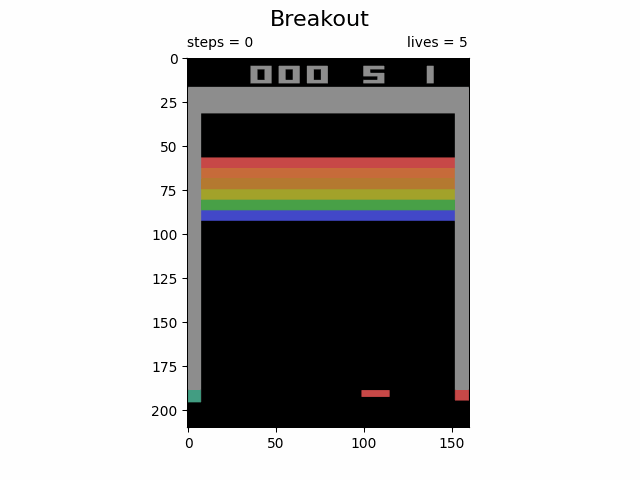

In [ ]:
IPython.display.Image(gif, format='gif')